# Loading Libraries and Initialize

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

# Reading data from CSV file and filtering Apple stock price 

In [2]:
allData = pd.read_csv('Data//all_stocks_5yr.csv', index_col=['date'], parse_dates=['date'])
df = allData[allData['Name'] == 'AAPL']

# Simple Moving Average (SMA)
<img src="images/sma.png">
- Parameter p (window) is important.
- Rolling average is the same as moving average.
- SMA is useful to understand the trend.

In [3]:
def simple_moving_average(series, window = 3) :
    cumsum, moving_aves = [0], []
    for i, x in enumerate(series, 1):
        cumsum.append(cumsum[i-1] + x)
        if i >= window:
            moving_ave = (cumsum[i] - cumsum[i-window]) / window
        else:
            moving_ave = None
        moving_aves.append(moving_ave)
        
    return moving_aves

# Calculating Simple Moving Average

In [4]:
window = 15 #days
df['sma'] = simple_moving_average(df['close'], window)
df.tail(10)

,open,high,low,close,volume,Name,sma
date,,,,,,,
2018-01-25,174.505,174.9500,170.5300,171.11,41529004,AAPL,175.716667
2018-01-26,172.000,172.0000,170.0600,171.51,39143011,AAPL,175.615333
2018-01-29,170.160,170.1600,167.0700,167.96,50640406,AAPL,175.146000
2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,174.654000
2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,174.194000
2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,173.760000
2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,172.774667
2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,171.401333
2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,170.524000


# Visualizing All Data

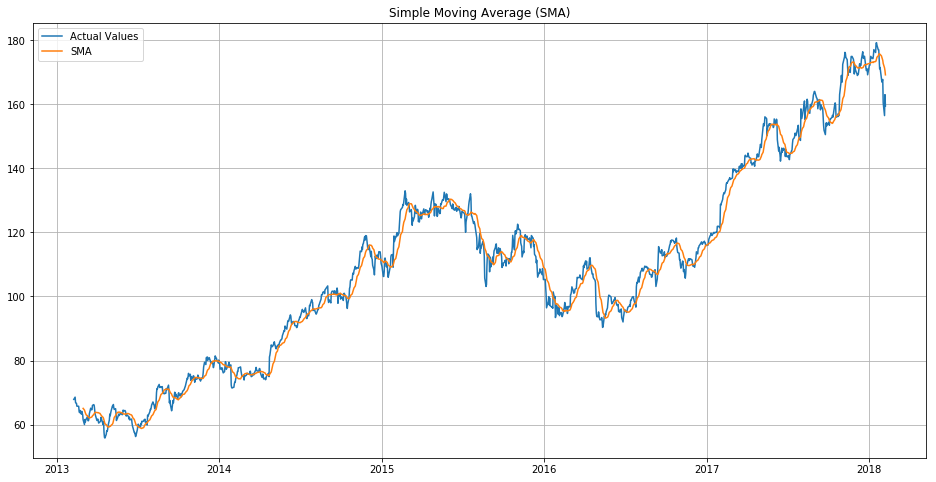

In [5]:
plt.figure(figsize=(16,8))
plt.title('Simple Moving Average (SMA)')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['sma'], label='SMA'.format(window))

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualizing Last 200 Days

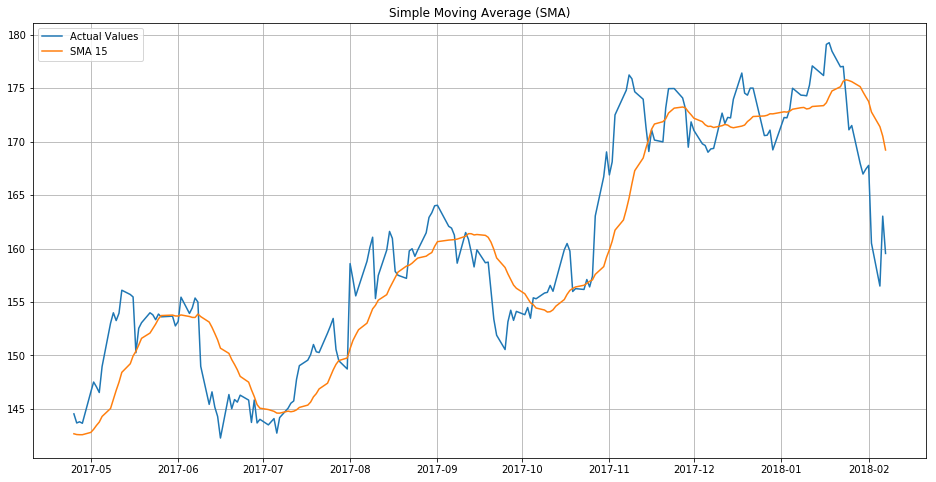

In [6]:
df = df[-200:]

plt.figure(figsize=(16,8))
plt.title('Simple Moving Average (SMA)')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['sma'], label='SMA {}'.format(window))

plt.legend(loc='upper left')
plt.grid(True)
plt.show()